# Necassary Imports

In [1]:
# Imports
import gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

import re
#import inflect
#from num2words import num2words
from nltk.corpus import stopwords
from collections import Counter

import sklearn

from gensim.models import Word2Vec

from sklearn.model_selection import ParameterSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV

from nltk.stem import WordNetLemmatizer
import nltk 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bvits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bvits\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bvits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Necassary preprocessing steps

In [2]:
# Import data
df = pd.read_csv('us_equities_news_dataset.csv')

In [3]:
# Filter out Nvidia articles
nvidia_df = df[df['title'].str.contains('NVIDIA|NVDA', case=False, na=False) |
               df['content'].str.contains('NVIDIA|NVDA', case=False, na=False) |
               df['ticker'].str.contains('NVIDIA|NVDA', case=False, na=False)]

In [4]:
print(len(nvidia_df))

3464


In [5]:
#Pre processing steps
def preprocess_text_iteration1(text):
    text = text.strip()
    # Replace URLs with an empty string
    re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    words = word_tokenize(text.lower())
    #check if the word is alpha numeric
    alpha_words = [word for word in words if word.isalpha()]
    #remove numbers
    numbers_words = [word for word in alpha_words if not word.isdigit()]
    return numbers_words

# apply preprocessing
nvidia_df['content'] = nvidia_df['content'].apply(preprocess_text_iteration1)

C:\Users\bvits\AppData\Local\Temp\ipykernel_23292\2317645968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvidia_df['content'] = nvidia_df['content'].apply(preprocess_text_iteration1)


In [6]:
#create a document term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(nvidia_df['content'].apply(lambda x: ' '.join(x)))
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


[['the', 'to', 'nasdaq', 'at', 'nyse', 'on', 'was', 'inc', 'and', 'in'], ['the', 'to', 'and', 'of', 'in', 'that', 'is', 'on', 'for', 'it'], ['the', 'of', 'and', 'in', 'to', 'for', 'on', 'is', 'as', 'that'], ['the', 'of', 'to', 'and', 'in', 'zacks', 'is', 'year', 'company', 'for'], ['the', 'to', 'and', 'of', 'in', 'that', 'is', 'for', 'with', 'its']]
Topic 0: the to nasdaq at nyse on was inc and in
Topic 1: the to and of in that is on for it
Topic 2: the of and in to for on is as that
Topic 3: the of to and in zacks is year company for
Topic 4: the to and of in that is for with its
[[3.33679444e-04 9.98672051e-01 3.31530940e-04 3.32240994e-04
  3.30497360e-04]
 [1.46724347e-02 9.84048657e-01 4.24542898e-04 4.25398167e-04
  4.28967212e-04]
 [1.17503317e-01 1.57607207e-01 6.83934649e-01 4.47099975e-04
  4.05077274e-02]
 ...
 [3.06023673e-04 6.26508095e-02 6.73968436e-01 2.62765056e-01
  3.09674869e-04]
 [1.44314196e-04 3.58371492e-03 8.02585662e-01 1.93541172e-01
  1.45136982e-04]
 [2.463

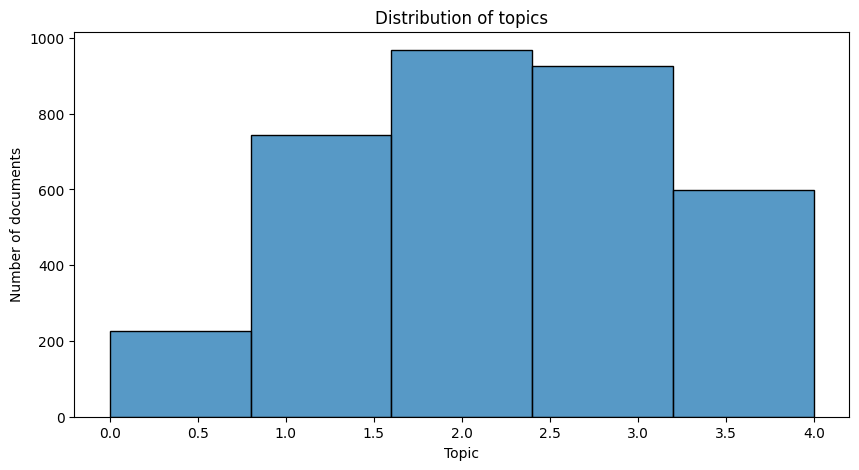

In [7]:
# train LDAModel
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# get topics
def get_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    topics = []
    for topic in model.components_:
        topic_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(topic_words)
    return topics

topics = get_topics(lda, vectorizer, 10)
print(topics)
for i, topic in enumerate(topics):
    print('Topic {}: {}'.format(i, ' '.join(topic)))


# get topic distribution for each document
topic_dist = lda.transform(X)
print(topic_dist)

# plot the distribution of topics
plt.figure(figsize=(10, 5))
sns.histplot(topic_dist.argmax(axis=1), bins=5)
plt.xlabel('Topic')
plt.ylabel('Number of documents')
plt.title('Distribution of topics')
plt.show()



In [8]:
# FuzzyTM FLSA-W
from FuzzyTM import FLSA_W

# Coherence and Diversity



In [9]:
# create a cluster plot for the topics

#if we have more time we look this because it is a cool plot (we don't fully understand it because copilot made it)

# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=0)
# tsne_embedding = tsne.fit_transform(topic_dist)
# plt.figure(figsize=(10, 5))
# sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=topic_dist.argmax(axis=1), palette='tab10')
# plt.xlabel('t-SNE component 1')
# plt.ylabel('t-SNE component 2')
# plt.title('t-SNE plot of topics')
# plt.show()

## FLSA-W

In [10]:


# create a FLSA-W model
flsaW = FLSA_W(
input_file = nvidia_df['content'].to_list(),
num_topics=5,
num_words=10,
)

In [11]:
flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL
print(flsaW.show_topics())


[(0, '0.0002*"the" + 0.0002*"to" + 0.0002*"in" + 0.0002*"of" + 0.0002*"a" + 0.0002*"and" + 0.0002*"on" + 0.0002*"for" + 0.0002*"s" + 0.0002*"with"'), (1, '0.009*"book" + 0.0077*"evolution" + 0.0075*"books" + 0.0071*"richard" + 0.0066*"science" + 0.006*"certainty" + 0.0056*"modern" + 0.0055*"professor" + 0.005*"me" + 0.0045*"beliefs"'), (2, '0.0008*"traded" + 0.0007*"reuters" + 0.0007*"exchange" + 0.0006*"composite" + 0.0006*"session" + 0.0006*"chipmaker" + 0.0006*"rose" + 0.0006*"blast" + 0.0006*"previously" + 0.0006*"bell"'), (3, '0.0005*"gmt" + 0.0004*"outnumbered" + 0.0003*"performers" + 0.0003*"settle" + 0.0003*"the" + 0.0003*"to" + 0.0003*"slumped" + 0.0003*"in" + 0.0003*"of" + 0.0003*"a"'), (4, '0.0019*"nvda" + 0.0019*"nvidia" + 0.0017*"com" + 0.0017*"nasdaq" + 0.0016*"shares" + 0.0015*"nyse" + 0.0015*"advanced" + 0.0015*"days" + 0.0015*"during" + 0.0015*"p"')]


In [12]:
for topic in flsaW.show_topics(representation='words'):
    print(topic)


print(flsaW.get_coherence_score()) # ask if this has to be high
print(flsaW.get_diversity_score()) # ask if this has to be high
print(flsaW.get_interpretability_score()) # ask if this has to be high




['the', 'to', 'in', 'of', 'a', 'and', 'on', 'for', 's', 'with']
['book', 'evolution', 'books', 'richard', 'science', 'certainty', 'modern', 'professor', 'me', 'beliefs']
['traded', 'reuters', 'exchange', 'composite', 'session', 'chipmaker', 'rose', 'blast', 'previously', 'bell']
['gmt', 'outnumbered', 'performers', 'settle', 'the', 'to', 'slumped', 'in', 'of', 'a']
['nvda', 'nvidia', 'com', 'nasdaq', 'shares', 'nyse', 'advanced', 'days', 'during', 'p']
0.41443719248642524
0.9
0.3729934732377827


In [13]:
#coherence for lda
print(
flsaW.get_coherence_score(
nvidia_df['content'].to_list(),
topics)
)

0.32606610536545527


In [14]:
#diversity for lda
print(flsaW.get_diversity_score(topics))

0.42


## Bert Topic

In [15]:
from bertopic import BERTopic
docs = [' '.join(doc) for doc in nvidia_df['content']]
# Create the model (uses DistilBERT by default)
bert_topic = BERTopic()
# Train the model and transform your data into topics
topic_assigned_to_doc, _ = bert_topic.fit_transform(docs)
topic_matrix = bert_topic.get_topic_info()
bert_topic.get_topics()



c:\Users\bvits\OneDrive\Desktop\2024\Uni\NLP\package install\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{-1: [('the', 0.012782543993462427),
  ('and', 0.011784003399568135),
  ('of', 0.011623886098160355),
  ('to', 0.011144509016571859),
  ('in', 0.011044339442828179),
  ('is', 0.009448919181066322),
  ('for', 0.00923655717327969),
  ('that', 0.00881126050059021),
  ('on', 0.008306803464170596),
  ('with', 0.008063877038781819)],
 0: [('nvidia', 0.022643572931320414),
  ('gaming', 0.013125440531986943),
  ('the', 0.012108173081046796),
  ('to', 0.011859594498463211),
  ('of', 0.011852783325512676),
  ('in', 0.011452780528267063),
  ('and', 0.010520540950015905),
  ('its', 0.010249374164676486),
  ('company', 0.010033145732647526),
  ('year', 0.00990527484050764)],
 1: [('the', 0.014218837448491147),
  ('on', 0.011820086632438312),
  ('week', 0.011074174691864194),
  ('to', 0.011032893716098273),
  ('fed', 0.0108050267600744),
  ('in', 0.00999364751597495),
  ('that', 0.009740291770425088),
  ('and', 0.009222999894349873),
  ('of', 0.00921823786728967),
  ('for', 0.009194675623151405)],
 

In [16]:
print(topic_matrix)

    Topic  Count                           Name  \
0      -1    976               -1_the_and_of_to   
1       0    413         0_nvidia_gaming_the_to   
2       1    135               1_the_on_week_to   
3       2     79   2_analyst_zacks_research_and   
4       3     64          3_apple_iphone_to_the   
..    ...    ...                            ...   
65     64     12  64_notes_cash_offering_senior   
66     65     12         65_traded_at_gmt_seven   
67     66     11        66_read_losers_ndls_ttd   
68     67     10   67_intel_ai_habana_inference   
69     68     10         68_cloud_growth_etf_of   

                                       Representation  \
0     [the, and, of, to, in, is, for, that, on, with]   
1   [nvidia, gaming, the, to, of, in, and, its, co...   
2    [the, on, week, to, fed, in, that, and, of, for]   
3   [analyst, zacks, research, and, is, the, inves...   
4   [apple, iphone, to, the, in, and, of, it, that...   
..                                           

In [17]:
bert_topic.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_nvidia_gaming_the, 1_the_on_week, 2_analyst_zacks_research,
                    3_apple_iphone_to, 4_million_revenues_quarter,
                    5_performers_close_which, 6_semiconductor_etf_earnings,
                    7_tech_the_of, 8_intel_and_to, 9_tracey_podcast_value,
                    10_micron_dram_nand, 11_china_huawei_chinese, 12_amd_we_year,
                    13_the_this_today, 14_resistance_roku_stock,
                    15_amd_radeon_graphics, 16_driving_self_autonomous,
                    17_earnings_estimates_members, 18_earnings_nyse_on,
                    19_ai_robotics_and, 20_day_trading_above, 21_games_gaming_game,
                    22_driving_self_autonomous, 23_futures_points_while,
                    24_nyse_nasdaq_trade, 25_facebook_users_user,
                    26_bitcoin_blockchain_crypt..., 27_mellanox_ethernet_switches,
                    28_storage_pure_western, 29_traded_at_gmt, 30_traded_at_gmt,
                    31_percent_nyse_nasdaq, 32_you_week_this, 33_index_dow_the,
                    34_inc_it_nasdaq, 35_traded_at_gmt,
                    36_tsmc_taiwan_semiconductor, 37_us_targets_scenario,
                    38_after_stock_nasdaq, 39_qualcomm_commission_pate...,
                    40_traded_at_gmt, 41_google_it_alphabet, 42_fang_fngu_stocks,
                    43_cadence_design_verificat..., 44_lunch_dave_on,
                    45_broadcom_quarter_revenues, 46_earnings_growth_or,
                    47_hp_intel_core, 48_netapp_cloud_quarter,
                    49_mobileye_driving_autonom..., 50_percent_dow_after,
                    51_trump_china_trade, 52_china_chip_semiconductor,
                    53_tesla_musk_vice, 54_traded_at_gmt, 55_traded_at_gmt,
                    56_softbank_fund_vision, 57_rallied_australian_climbed,
                    58_coronavirus_china_and, 59_around_resistance_stock,
                    60_ansys_simulation_stratasys, 61_qualcomm_intel_modem,
                    62_baidu_apollo_driving, 63_million_year_quarter,
                    64_notes_cash_offering, 65_traded_at_gmt, 66_read_losers_ndls,
                    67_intel_ai_habana, 68_cloud_growth_etf],
              'xaxis': 'x',
              'y': [0_nvidia_gaming_the, 1_the_on_week, 2_analyst_zacks_research,
                    3_apple_iphone_to, 4_million_revenues_quarter,
                    5_performers_close_which, 6_semiconductor_etf_earnings,
                    7_tech_the_of, 8_intel_and_to, 9_tracey_podcast_value,
                    10_micron_dram_nand, 11_china_huawei_chinese, 12_amd_we_year,
                    13_the_this_today, 14_resistance_roku_stock,
                    15_amd_radeon_graphics, 16_driving_self_autonomous,
                    17_earnings_estimates_members, 18_earnings_nyse_on,
                    19_ai_robotics_and, 20_day_trading_above, 21_games_gaming_game,
                    22_driving_self_autonomous, 23_futures_points_while,
                    24_nyse_nasdaq_trade, 25_facebook_users_user,
                    26_bitcoin_blockchain_crypt..., 27_mellanox_ethernet_switches,
                    28_storage_pure_western, 29_traded_at_gmt, 30_traded_at_gmt,
                    31_percent_nyse_nasdaq, 32_you_week_this, 33_index_dow_the,
                    34_inc_it_nasdaq, 35_traded_at_gmt,
                    36_tsmc_taiwan_semiconductor, 37_us_targets_scenario,
                    38_after_stock_nasdaq, 39_qualcomm_commission_pate...,
                    40_traded_at_gmt, 41_google_it_alphabet, 42_fang_fngu_stocks,
                    43_cadence_design_verificat..., 44_lunch_dave_on,
                    45_broadcom_quarter_revenues, 46_earnings_growth_or,
                    47_hp_intel_core, 48_netapp_cloud_quarter,
     

In [18]:
topic_matrix.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,976,-1_the_and_of_to,"[the, and, of, to, in, is, for, that, on, with]",[for immediate releasechicago il may zacks com...
1,0,413,0_nvidia_gaming_the_to,"[nvidia, gaming, the, to, of, in, and, its, co...",[for immediate releasechicago il jan highlight...
2,1,135,1_the_on_week_to,"[the, on, week, to, fed, in, that, and, of, for]",[friday market open have you ever been on a ro...
3,2,79,2_analyst_zacks_research_and,"[analyst, zacks, research, and, is, the, inves...",[for immediate releasechicago il january zacks...
4,3,64,3_apple_iphone_to_the,"[apple, iphone, to, the, in, and, of, it, that...",[last week was an exciting one with some rumor...
5,4,60,4_million_revenues_quarter_year,"[million, revenues, quarter, year, company, za...",[keeping its positive surprise history alive p...
6,5,58,5_performers_close_which_inc,"[performers, close, which, inc, at, rose, or, ...",[investing com u s stocks were mixed after the...
7,6,55,6_semiconductor_etf_earnings_has,"[semiconductor, etf, earnings, has, of, score,...",[the semiconductor corner of the broad technol...
8,7,54,7_tech_the_of_in,"[tech, the, of, in, and, technology, nasdaq, s...",[the technology sector has been the investors ...
9,8,54,8_intel_and_to_the,"[intel, and, to, the, in, of, data, is, that, ...",[this week over of s p companies are set to re...


In [19]:
# print the name of the topic matrix and the representative docs using for loop
for i in range(0, 11):
    print(topic_matrix['Name'][i])
    print(topic_matrix['Representative_Docs'][i])
    print('')

-1_the_and_of_to
['for immediate releasechicago il may zacks com announces the list of stocks featured in the analyst blog every day the zacks equity research analysts discuss the latest news and events impacting stocks and the financial markets stocks recently featured in the blog include intel nasdaq intc texas instruments nasdaq txn xilinx nasdaq xlnx lam research nasdaq lrcx and taiwan semiconductor manufacturing company nyse tsm here are highlights from wednesday s analyst blog how are semiconductor companies doing this quarter semiconductor stocks have been mixed so far and a broader cyclical slowdown seems apparent from the results most players aren t expecting a protracted downturn mainly because the rollout is coming sooner than expected because auto content adds are continuing and other secular drivers like artificial intelligence ai and internet of things iot remain ongoing drivers additionally technology transition to smaller nodes is a positive for equipment companies the 

In [20]:
#create a list of the first 10 representative docs
rep_docs = topic_matrix['Representation'][1:6].to_list()
print(rep_docs)




[['nvidia', 'gaming', 'the', 'to', 'of', 'in', 'and', 'its', 'company', 'year'], ['the', 'on', 'week', 'to', 'fed', 'in', 'that', 'and', 'of', 'for'], ['analyst', 'zacks', 'research', 'and', 'is', 'the', 'investment', 'of', 'in', 'reports'], ['apple', 'iphone', 'to', 'the', 'in', 'and', 'of', 'it', 'that', 'is'], ['million', 'revenues', 'quarter', 'year', 'company', 'zacks', 'of', 'cents', 'the', 'rank']]


In [ ]:
#bert coherence
print(
flsaW.get_coherence_score(
nvidia_df['content'].to_list(),
rep_docs)
)


In [21]:
#bert diversity
print(flsaW.get_diversity_score(rep_docs))

0.58


topic